# Financial Planning with APIs and Simulations

Part 1: Gather prices for crypto, bond, and stock portfolio holdings.

Part 2: Run Monte Carlo Simulation for the portfolio


In [99]:
# Import libraries and dependencies
import os
import requests
import json
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [100]:
# Load the environment variables from the .env file
load_dotenv()

True

#### Gather Inputs for Crypto Holdings

In [143]:
btc_coins = 1.2
eth_coins = 5.3


#### Create End Points for Alpaca Crypto API

In [144]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Get BTC Price

In [145]:
btc_response = requests.get(btc_url).json()
json.dumps(btc_response)
# print(json.dumps(btc_response, indent=3))
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)


29919.0


#### Get ETH Price

In [146]:
eth_response = requests.get(eth_url).json()
json.dumps(eth_response)
# print(json.dumps(eth_response, indent=3))
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
print(eth_price)


2064.06


#### Calculate Value of Crypto Holdings

In [153]:
btc_value = float(btc_coins * btc_price)
eth_value = float(eth_coins * eth_price)
total_crypto_wallet = btc_value + eth_value
print(format(total_crypto_wallet,".2f"))


46842.32


#### Gather Inputs for Stock and Bond Holdings

In [106]:
spy_shares = 110
agg_shares = 200

#### Set Variables and Create Object for Alpaca `tradeapi.REST`

In [107]:
ALPACA_API_KEY = os.getenv("ALPACA_API_KEY")
ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    ALPACA_API_KEY,
    ALPACA_SECRET_KEY,
    api_version = "v2"
)

#### Set Parameters for Alpaca API Call

In [176]:
tickers = ["SPY", "AGG"]
timeframe = "1D"
date = "2022-05-12"
start_date = pd.Timestamp(date, tz="America/New_York").isoformat()
end_date = pd.Timestamp(date, tz="America/New_York").isoformat()

#### Get Current Closing Prices via Alpaca `get_barset` Function

In [177]:
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df
ticker_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-05-12 04:00:00+00:00,102.94,103.14,102.865,102.95,9011922,29535,103.014617,AGG
2022-05-12 04:00:00+00:00,389.58,395.80,385.150,392.34,125230250,1476378,389.974924,SPY


#### Restructure DataFrame

In [178]:
SPY_df = ticker_data[ticker_data["symbol"]=="SPY"].drop("symbol", axis=1)
AGG_df = ticker_data[ticker_data["symbol"]=="AGG"].drop("symbol", axis=1)

ticker_data_df = pd.concat([SPY_df, AGG_df], axis=1, keys=["SPY", "AGG"])
ticker_data_df.head()

SPY                                    \
                             open   high     low   close     volume   
timestamp                                                             
2022-05-12 04:00:00+00:00  389.58  395.8  385.15  392.34  125230250   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-05-12 04:00:00+00:00     1476378  389.974924  102.94  103.14  102.865   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-05-12 04:00:00+00:00  102.95  9011922       29535  103.014617

#### Display Ticker Closing Prices

In [183]:
closing_prices_df=pd.DataFrame()

closing_prices_df["AGG"] = ticker_data_df["AGG"]["close"]
agg_close_price = float(closing_prices_df["AGG"])
                        
closing_prices_df["SPY"] = ticker_data_df["SPY"]["close"]
spy_close_price = float(closing_prices_df["SPY"])
                        
print(f"AGG = {agg_close_price}\nSPY = {spy_close_price}")


AGG = 102.95
SPY = 392.34


#### Calculate Total Portfolio Value

In [184]:
agg_value = agg_shares * agg_close_price
spy_value = spy_shares * spy_close_price
total_stocks_bonds = agg_value + spy_value
total_portfolio = total_crypto_wallet + total_stocks_bonds
print(total_portfolio)


110589.718


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Create Savings DataFrame

In [114]:
savings_data = [total_crypto_wallet, total_stocks_bonds]

savings_df = pd.DataFrame(savings_data,
    columns=["Amount"],
    index=["Crypto","Stock/Bond"])

#### Plot Portfolio Composition

<AxesSubplot:title={'center':'Portfolio Composition'}>

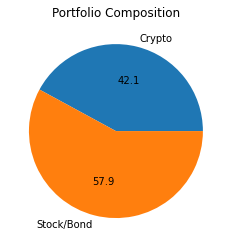

In [115]:
savings_df_plot = savings_df.plot.pie(y="Amount",title="Portfolio Composition",
                                      ylabel="",legend=False, autopct="%.1f")
savings_df_plot

## Part 2: Monte Carlo Simulation

#### Make Alpaca API call to get 3 years of historical closing prices for a portfolio split.

#### Set Parameters for API Call

In [137]:
three_yrs_ago = date - relativedelta(years=3)

start_date = pd.Timestamp(three_yrs_ago, tz="America/New_York").isoformat()
end_date = pd.Timestamp(date, tz="America/New_York").isoformat()

limit_3yr = 1000

#### Get Prices

In [139]:
ticker_data_3yr = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_3yr
).df

ticker_data_3yr.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-13 04:00:00+00:00,108.83,108.9768,108.815,108.85,6733774,18575,108.884846,AGG
2019-05-14 04:00:00+00:00,108.90,108.9700,108.870,108.94,6217044,21837,108.919203,AGG
2019-05-15 04:00:00+00:00,109.16,109.1800,109.000,109.13,2667156,12362,109.089171,AGG
2019-05-16 04:00:00+00:00,109.04,109.0400,108.950,109.00,2756957,9263,108.993556,AGG
2019-05-17 04:00:00+00:00,109.12,109.1450,108.935,109.03,2092402,7452,109.023836,AGG


#### Format DataFrame

In [140]:
# Separate ticker data
agg_3 = ticker_data_3yr[ticker_data_3yr["symbol"]=="AGG"].drop("symbol",axis=1)
spy_3 = ticker_data_3yr[ticker_data_3yr["symbol"]=="SPY"].drop("symbol",axis=1)

# Concatenate the ticker DataFrames
ticker_data_3yr = pd.concat([agg_3,spy_3], axis=1, keys=("AGG","SPY"))

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [141]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
mc_10yr=MCSimulation(
    portfolio_data=ticker_data_3yr,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252*10)

# Review the simulation input data
mc_10yr.portfolio_data.head()


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-05-13 04:00:00+00:00  108.83  108.9768  108.815  108.85  6733774   
2019-05-14 04:00:00+00:00  108.90  108.9700  108.870  108.94  6217044   
2019-05-15 04:00:00+00:00  109.16  109.1800  109.000  109.13  2667156   
2019-05-16 04:00:00+00:00  109.04  109.0400  108.950  109.00  2756957   
2019-05-17 04:00:00+00:00  109.12  109.1450  108.935  109.03  2092402   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-05-13 04:00:00+00:00       18575  108.884846          NaN  282.39   
2019-05-14 04:00:00+00:00       21837  108.919203     0.000827  282.01   
2019-05-15 04:00:00+00:00       12362  109.089171     0.001744  281.60   
2019-05-16 04:00:00+00:00        9263  108.993556    -0.001191  285.83   
2019-05-17 04:00:00+00:00        7452  109.023836     0.000275  285.13   

                                                                              \
                             high       low   close       volume trade_count   
timestamp                                                                      
2019-05-13 04:00:00+00:00  283.49  279.9300  280.86  127837979.0    670187.0   
2019-05-14 04:00:00+00:00  285.10  281.8500  283.40   77106090.0    390251.0   
2019-05-15 04:00:00+00:00  285.77  281.3600  285.06   75152409.0    364823.0   
2019-05-16 04:00:00+00:00  289.21  285.7600  287.70   77186068.0    352847.0   
2019-05-17 04:00:00+00:00  288.60  285.1207  285.84  100853024.0    401172.0   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-05-13 04:00:00+00:00  281.560182          NaN  
2019-05-14 04:00:00+00:00  283.609239     0.009044  
2019-05-15 04:00:00+00:00  284.276653     0.005857  
2019-05-16 04:00:00+00:00  287.797144     0.009261  
2019-05-17 04:00:00+00:00  286.609816    -0.006465

In [142]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_10yr.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2517,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2518,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2519,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

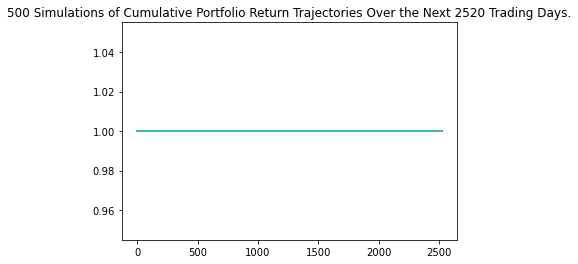

In [130]:
# Visualize the 30-year Monte Carlo simulation by creating an overlay line plot
mc_10yr.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

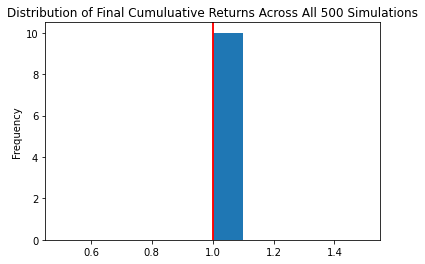

In [131]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mc_30yr.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [132]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
mc_30yr_statistics = mc_30yr.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(mc_30yr_statistics)

count           500.0
mean              1.0
std               0.0
min               1.0
25%               1.0
50%               1.0
75%               1.0
max               1.0
95% CI Lower      1.0
95% CI Upper      1.0
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [133]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)


64691.200000000004


In [134]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc_30yr_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mc_30yr_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds: .2f} in the portfolio"
  f" over the next 30 years will end within in the range of"
  f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


There is a 95% chance that an initial investment of $ 64691.20 in the portfolio over the next 30 years will end within in the range of $ 64691.20 and $ 64691.20.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [135]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
mc_10yr=MCSimulation(
    portfolio_data=ticker_data_3yr,
    weights=[.2,.8],
    num_simulation=500,
    num_trading_days=252*10)

# Review the simulation input data
mc_10yr.portfolio_data.head()


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-05-13 04:00:00+00:00  108.83  108.9768  108.815  108.85  6733774   
2019-05-14 04:00:00+00:00  108.90  108.9700  108.870  108.94  6217044   
2019-05-15 04:00:00+00:00  109.16  109.1800  109.000  109.13  2667156   
2019-05-16 04:00:00+00:00  109.04  109.0400  108.950  109.00  2756957   
2019-05-17 04:00:00+00:00  109.12  109.1450  108.935  109.03  2092402   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-05-13 04:00:00+00:00       18575  108.884846          NaN  282.39   
2019-05-14 04:00:00+00:00       21837  108.919203     0.000827  282.01   
2019-05-15 04:00:00+00:00       12362  109.089171     0.001744  281.60   
2019-05-16 04:00:00+00:00        9263  108.993556    -0.001191  285.83   
2019-05-17 04:00:00+00:00        7452  109.023836     0.000275  285.13   

                                                                              \
                             high       low   close       volume trade_count   
timestamp                                                                      
2019-05-13 04:00:00+00:00  283.49  279.9300  280.86  127837979.0    670187.0   
2019-05-14 04:00:00+00:00  285.10  281.8500  283.40   77106090.0    390251.0   
2019-05-15 04:00:00+00:00  285.77  281.3600  285.06   75152409.0    364823.0   
2019-05-16 04:00:00+00:00  289.21  285.7600  287.70   77186068.0    352847.0   
2019-05-17 04:00:00+00:00  288.60  285.1207  285.84  100853024.0    401172.0   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-05-13 04:00:00+00:00  281.560182          NaN  
2019-05-14 04:00:00+00:00  283.609239     0.009044  
2019-05-15 04:00:00+00:00  284.276653     0.005857  
2019-05-16 04:00:00+00:00  287.797144     0.009261  
2019-05-17 04:00:00+00:00  286.609816    -0.006465

In [136]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_10yr.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2517,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2518,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2519,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

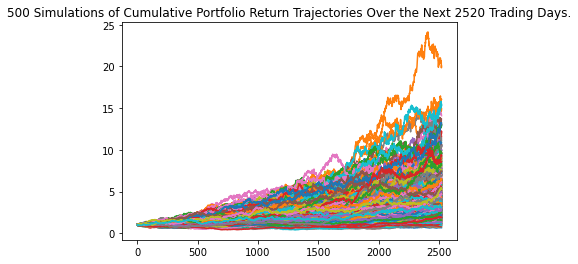

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
mc_10yr.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

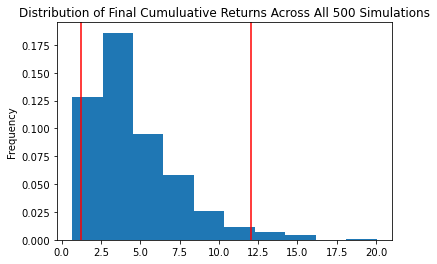

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
mc_10yr.plot_distribution()


In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
mc_10yr_statistics = mc_10yr.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(mc_10yr_statistics)

count           500.000000
mean              4.638233
std               2.811352
min               0.665438
25%               2.633498
50%               3.909198
75%               6.092803
max              20.029715
95% CI Lower      1.210397
95% CI Upper     12.071215
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
print(total_stocks_bonds)


69783.7


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mc_10yr_statistics[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mc_10yr_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds: .2f} in the portfolio"
  f" over the next 10 years will end within in the range of"
  f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")


There is a 95% chance that an initial investment of $ 69783.70 in the portfolio over the next 10 years will end within in the range of $ 84465.98 and $ 842374.01.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

***Answer:
From the Monte Carlo Simulation, we can see that the mean return over 10 years with an 80/20 portfolio allocation is it $327,073.

Depending on the member, this may be enough money to retire. The member must consider, however, that the lower 95% confidence interval shows a return of only \\$94,038 after 10 years. This is likely not enough money to retire. The credit union financial advisor should talk with their members to understand forecasted living expenses and desired retirement age. This will inform decision making about how to balance the portfolio.